1. 必要なライブラリのインポート

In [2]:
import pandas as pd
from darts import TimeSeries
from darts.datasets import AirPassengersDataset
from darts.metrics import mape

2. データのロードと可視化

<Axes: xlabel='Month'>

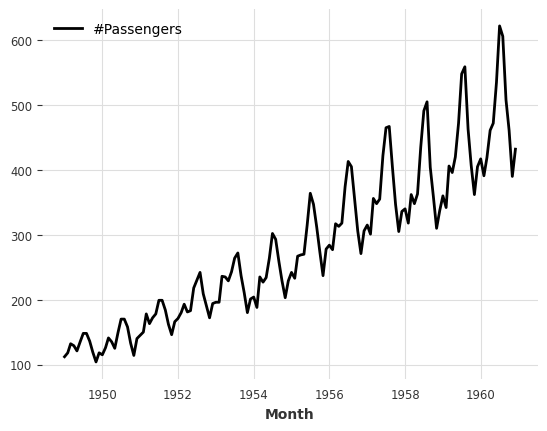

In [11]:
series = AirPassengersDataset().load()
# seriesのdtypeをflot64からfloat32に変更
series = series.astype('float32')
series.plot()

3. データの分割

<Axes: xlabel='Month'>

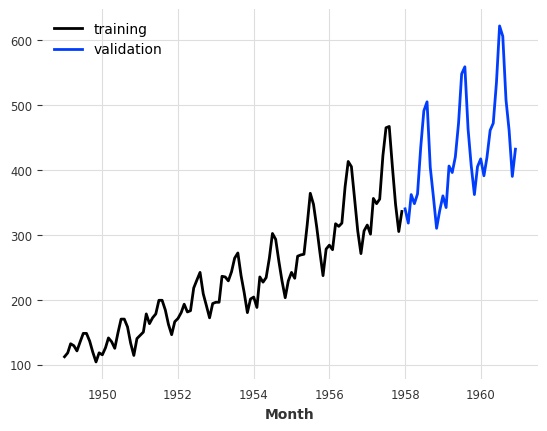

In [12]:
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
val.plot(label="validation")

4. 学習と評価

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | layer         | Linear           | 300   
---------------------------------------------------
300       Trainable params
0         Non-trainable params
300       Total params
0.001     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 3/3 [00:00<00:00, 126.39it/s, train_loss=447.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 3/3 [00:00<00:00, 121.31it/s, train_loss=447.0]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]
MAPE: 14.419528841972351


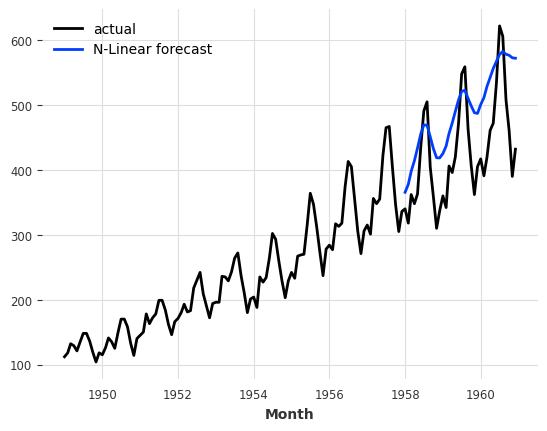

In [13]:
# N-Linear
from darts.models.forecasting.nlinear import NLinearModel

nlinear_model = NLinearModel(input_chunk_length=24, output_chunk_length=12)
nlinear_model.fit(train)
nlinear_forecast = nlinear_model.predict(36)

series.plot(label="actual")
nlinear_forecast.plot(label="N-Linear forecast")

print("MAPE:", mape(nlinear_forecast, val))

MAPE: 4.956899907357272


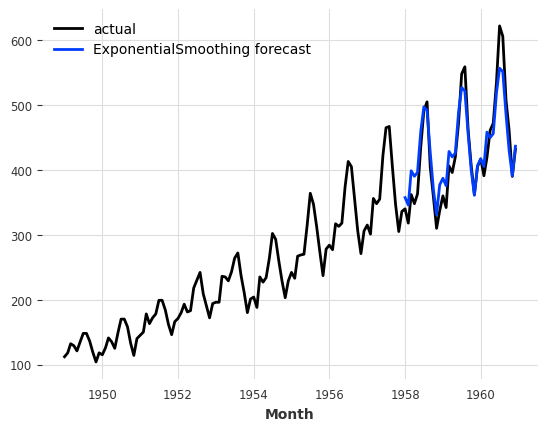

In [15]:
# ExponentialSmoothing
from darts.models import ExponentialSmoothing

exponential_smoothing_model = ExponentialSmoothing() 
exponential_smoothing_model.fit(train)
exponential_smoothing_forecast = exponential_smoothing_model.predict(36)

series.plot(label="actual")
exponential_smoothing_forecast.plot(label="ExponentialSmoothing forecast")

print("MAPE:", mape(exponential_smoothing_forecast, val))

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Epoch 99: 100%|██████████| 3/3 [00:01<00:00,  2.83it/s, train_loss=147.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 3/3 [00:01<00:00,  2.83it/s, train_loss=147.0]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]
MAPE: 9.356790035963058


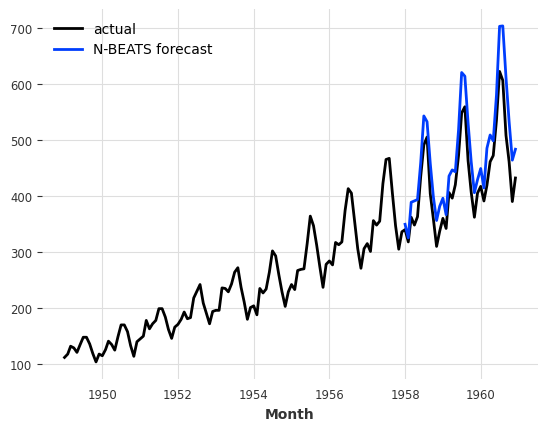

In [14]:
# NBEATSModel
from darts.models import NBEATSModel

nbeats_model = NBEATSModel(input_chunk_length=24, output_chunk_length=12)
nbeats_model.fit(train)
nbeats_forecast = nbeats_model.predict(36)

series.plot(label="actual")
nbeats_forecast.plot(label="N-BEATS forecast")

print("MAPE:", mape(nbeats_forecast, val))